<a href="https://colab.research.google.com/github/sumanpandey72/Sign-Language-Recognition/blob/main/Proj3_Model_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
pip install livelossplot

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau
from livelossplot import PlotLossesKerasTF
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from livelossplot import PlotLossesKerasTF
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics
import seaborn as sb

In [12]:
x_test = np.load('/content/drive/MyDrive/Proj3_Sign_Lang/X_test.npy')
x_train = np.load('/content/drive/MyDrive/Proj3_Sign_Lang/X_train.npy')
y_test = np.load('/content/drive/MyDrive/Proj3_Sign_Lang/Y_test.npy')
y_train = np.load('/content/drive/MyDrive/Proj3_Sign_Lang/Y_train.npy')

In [13]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train, test_size = 0.2, random_state = 12345)

In [14]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
x_validate = x_validate.reshape(-1,28,28,1)

x_train = x_train/255.0
x_test = x_test/255.0
x_validate = x_validate/255.0

label = LabelBinarizer()
y_train = label.fit_transform(y_train)
y_test = label.fit_transform(y_test)
y_validate = label.fit_transform(y_validate)


In [15]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 24, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)        

In [16]:
model.compile(loss ='categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

In [17]:
checkpoint = ModelCheckpoint("model_weights_1.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)

callbacks = [PlotLossesKerasTF(),checkpoint]

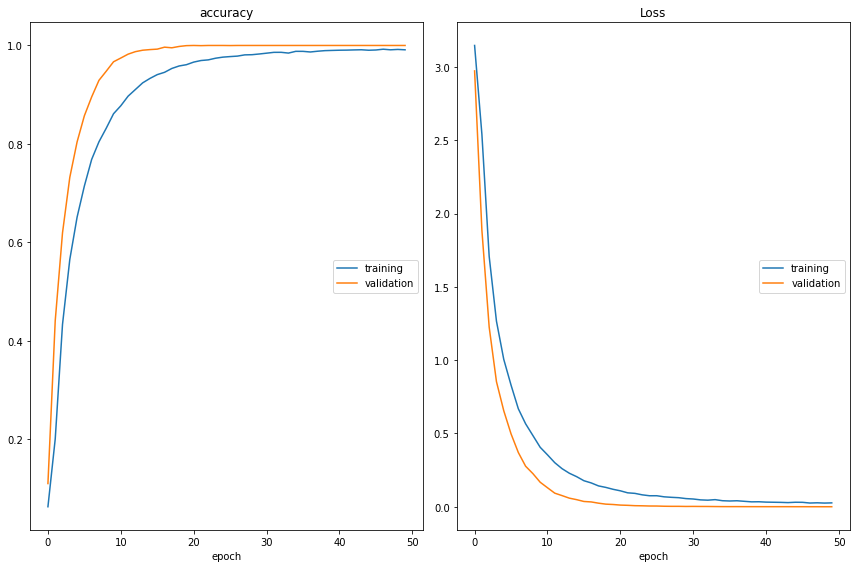

accuracy
	training         	 (min:    0.063, max:    0.992, cur:    0.991)
	validation       	 (min:    0.110, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.025, max:    3.147, cur:    0.027)
	validation       	 (min:    0.000, max:    2.974, cur:    0.000)

Epoch 00050: saving model to model_weights_1.h5


In [18]:
history = model.fit(x_train, y_train, batch_size = 512, epochs = 50, verbose = 1, validation_data = (x_validate, y_validate),callbacks=callbacks)

In [19]:
model.evaluate(x_test,y_test,verbose=0)

[0.15771108865737915, 0.9637479186058044]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


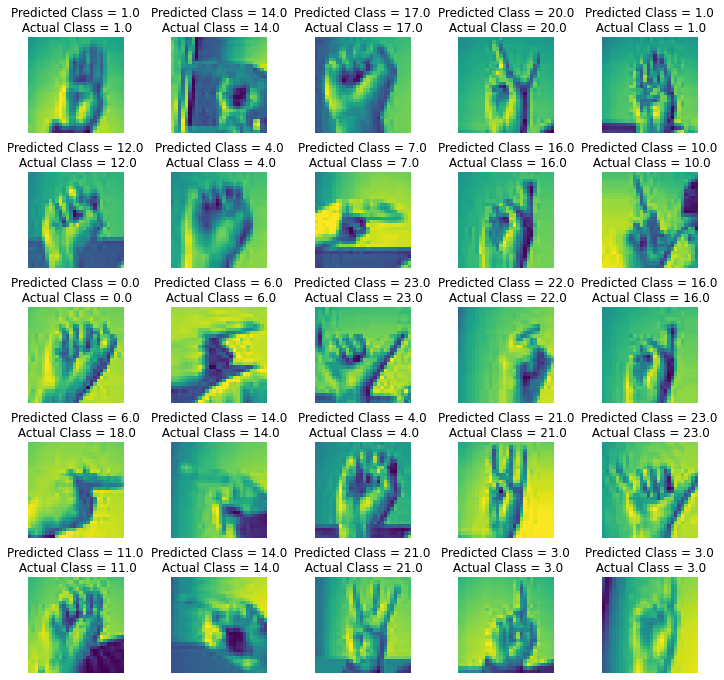

In [20]:
y_test=np.argmax(y_test, axis=1)
pred = model.predict_classes(x_test)

fig, a = plt.subplots(5, 5, figsize = (12,12))
a = a.ravel()
test_len = len(x_test)
for i in np.arange(0, 25):
    index = np.random.randint(0, test_len)
    a[i].imshow(x_test[index].reshape(28,28))
    a[i].set_title(f"Predicted Class = {pred[index]:0.1f}\n Actual Class = {y_test[index]:0.1f}")
    a[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [21]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      1.00      1.00       432
           2       0.93      1.00      0.97       310
           3       0.94      1.00      0.97       245
           4       1.00      1.00      1.00       498
           5       1.00      1.00      1.00       247
           6       0.91      0.94      0.92       348
           7       0.95      0.95      0.95       436
           8       0.88      0.95      0.91       288
           9       1.00      1.00      1.00       331
          10       1.00      0.99      0.99       209
          11       1.00      1.00      1.00       394
          12       1.00      1.00      1.00       291
          13       1.00      0.92      0.96       246
          14       1.00      0.99      1.00       347
          15       0.99      1.00      1.00       164
          16       0.95      1.00      0.98       144
          17       1.00    

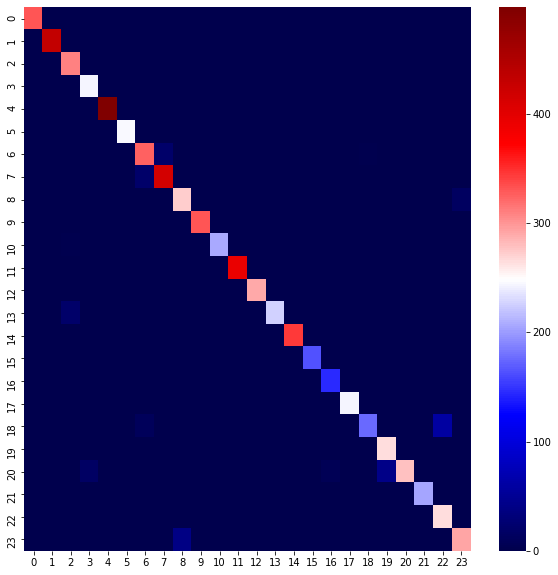

In [22]:
plt.figure(figsize=(10,10))
sb.heatmap(confusion_matrix(y_test,pred),cmap='seismic');